# Graph Analyses

### Goals

1. identify all csv files, and open them.
1. Print all the graphs.
2. Upload Some peak finding algorithems, and test them.
3. write a function that will display all graphs, with the peaks from an arbitrary peak finding algorithem

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import subprocess

pd.set_option('display.max_columns', 10) # display columns
pd.set_option('display.max_rows', 8)    # display rows

#plot in the notebook
%matplotlib inline

#create ipython editable plot in sepperate window
#%matplotlib qt   

import matplotlib as mpl

## Read In Data And Plot

### Example: Read Data, Build Plot (With One File)

In [25]:
# Get Files
str_files  = subprocess.check_output(["ls | grep '\.csv$'"],shell=True).decode("utf-8")
list_files = str_files.split("\n")[:-1]
list_files

['sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv',
 'sp002_051518_BaIrO3_916_195K_100-1200kHz.csv',
 'sp003_051518_BaIrO3_916_194K_100-1200kHz.csv']

In [3]:
# Read In Data
read_file = list_files[1]
df = pd.read_csv(read_file)
print("File Read: ",read_file)

File Read:  sp002_051518_BaIrO3_916_195K_100-1200kHz.csv


In [4]:
# Display Data
df.head(10)

,"Frequency, Hz - Peaks",Magnitude (V) - Peaks,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,129.9k,2.476297m,100k,729.632u
1,163.26k,1.406614m,100.02k,346.4334u
2,187.98k,3.072827m,100.04k,232.6887u
3,235.5k,1.928759m,100.06k,614.2753u
...,...,...,...,...
6,284.56k,2.041854m,100.12k,743.0403u
7,303.72k,2.103579m,100.14k,742.6972u
8,323.64k,6.908894m,100.16k,739.7663u
9,331.08k,2.128424m,100.18k,733.0368u


In [5]:
# Parse into peak and column Data

peak_headers   = list(df)[:2]
signal_headers = list(df)[2:]

df_peak    = df[peak_headers]
df_signal  = df[signal_headers]

# drop empty rows
df_peak   = df_peak.dropna(axis=0) 
df_signal = df_signal.dropna(axis=0) 

In [6]:
display(df_peak)
print(df_peak.dtypes,end="\n\n")
display(df_signal)
print(df_signal.dtypes,end="\n\n")

,"Frequency, Hz - Peaks",Magnitude (V) - Peaks
0,129.9k,2.476297m
1,163.26k,1.406614m
2,187.98k,3.072827m
3,235.5k,1.928759m
...,...,...
11,358.16k,8.995125m
12,366.26k,8.949304m
13,403.48k,1.251911m
14,973.6k,1.279613m


Frequency, Hz - Peaks    object
Magnitude (V) - Peaks    object
dtype: object



,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,100k,729.632u
1,100.02k,346.4334u
2,100.04k,232.6887u
3,100.06k,614.2753u
...,...,...
54997,1.19994M,20.8403u
54998,1.19996M,20.34196u
54999,1.19998M,18.38601u
55000,1.2M,17.04597u


Frequency, Hz - Signal    object
Magnitude (V) - Signal    object
dtype: object



In [7]:
# Convert the data to floats
def convert(val):
    
    # conversion dictionary
    conversions = {
                    'n':10**-9,
                    'u':10**-6,
                    'm':10**-3,
                    'k':10**3,  
                    'M':10**6
                  }
    
    # get the last character in a value
    str_val   = str(val)
    last_char = str_val[-1]
    
    # convert last char it is in dictionary if it is in conversion list
    if last_char in conversions:
        val = float(str_val[:-1])*conversions[last_char]
    
    # implictely convert to float
    else:     
        try:
            val = float(val)
        except:
            print("Failed to Implicitely Convert to Float: ",val)
            return None
    
    return val
    

In [8]:
df_signal = df_signal.applymap(convert)
df_peak   = df_peak.applymap(convert)

In [9]:
print(df_peak.dtypes)
display(df_peak)

print(df_signal.dtypes)
display(df_signal)

Frequency, Hz - Peaks    float64
Magnitude (V) - Peaks    float64
dtype: object


,"Frequency, Hz - Peaks",Magnitude (V) - Peaks
0,129900.0,0.002476
1,163260.0,0.001407
2,187980.0,0.003073
3,235500.0,0.001929
...,...,...
11,358160.0,0.008995
12,366260.0,0.008949
13,403480.0,0.001252
14,973600.0,0.001280


Frequency, Hz - Signal    float64
Magnitude (V) - Signal    float64
dtype: object


,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,100000.0,0.000730
1,100020.0,0.000346
2,100040.0,0.000233
3,100060.0,0.000614
...,...,...
54997,1199940.0,0.000021
54998,1199960.0,0.000020
54999,1199980.0,0.000018
55000,1200000.0,0.000017


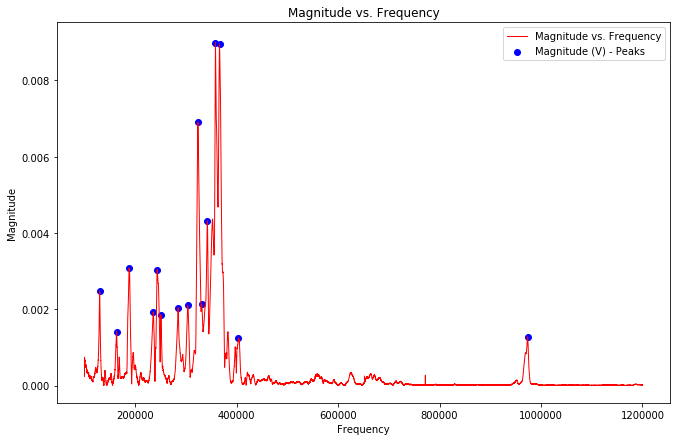

In [10]:
# Plot

%matplotlib inline

# set plot size
mpl.rcParams['figure.figsize'] = (11,7) 

# Signal Data
x = Frequency = df_signal[signal_headers[0]]
y = Magnitude = df_signal[signal_headers[1]]

# Signal Plot
plt.plot(x, y, 
         linewidth=1, linestyle="-",
         color="red", label="Magnitude vs. Frequency")

# Peak Data
x_peak = df_peak[peak_headers[0]]
y_peak = df_peak[peak_headers[1]]

# Peak Plot
plt.scatter(x_peak, y_peak, color='blue')



plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Frequency")
plt.legend(loc="upper right")

plt.show()

In [11]:
del x_peak, y_peak, x, y, df_peak, df_signal, peak_headers, signal_headers, df, list_files

### Read In all Data

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

#       --- Get/Clean Data  ---

def get_files(directory='.'):
    '''
    Returns: 
        - list of csv files from a given directory
    Parameters:
        - Directory: specifies the directory with the files you would like to analyze.
            - By Defualt: this method will use the current directory.
    '''
    
    # use shell command to get file list
    str_files  = subprocess.check_output(["ls "+directory+" | grep '\.csv$'"],shell=True).decode("utf-8")
    list_files = str_files.split("\n")
    
    # remove empty list elements
    while '' in list_files: list_files.remove('')  
        
    return list_files

def get_headers(file_name, signal_x_ind, signal_y_ind, peak_x_ind, peak_y_ind):
    '''
    PARAMETERS:
        - pass in a file, and the indices of the repective data
    RETURNS:
        - signal and peak labels for the data being used
    '''
    df = pd.read_csv(file_name)
    headers = list(df)
    
    signal_headers = [headers[signal_x_ind]] + [headers[signal_y_ind]]
    peak_headers   = [headers[peak_x_ind]]   + [headers[peak_y_ind]]

    return signal_headers, peak_headers

def convert(val):
    '''
    DESCRIPTION:
        - converts a string into a float.
        - You can use pandas to run this function over specific columns
          in your data, using, "df.apply_map(func)"
        - This is a helper function for store_file_data
    '''
    
    # conversion dictionary
    conversions = {
                    'n':10**-9,
                    'u':10**-6,
                    'm':10**-3,
                    'k':10**3,  
                    'M':10**6
                  }
    
    # get the last character in a value
    str_val   = str(val)
    last_char = str_val[-1]
    
    # convert last char it is in dictionary if it is in conversion list
    if last_char in conversions:
        val = float(str_val[:-1])*conversions[last_char]
    
    # implictely convert to float
    else:     
        try:
            val = float(val)
        except:
            print("Failed to Implicitely Convert to Float: ",val)
            return None
    
    return val

def store_file_data(file_names,signal_headers,peak_headers):
    '''
    DESCRIPTION:
        1. reads in all of the data, from all of the files
        2. parses all of the data
        3. splits the data into signal, and peak data, 
           that are stored in dataframes.
    RETURNS: dictionary:
        - KEY:   file_name
        - VALUE: (signal-DataFrame, peak-DataFrame)
    '''
    
    file_to_data = {}
    
    for read_file in file_names:
        
        # Read Data
        df = pd.read_csv(read_file)
           
        # Sepperate DataFrames
        df_signal  = df[list(df)[2:]]
        df_peak    = df[list(df)[:2]]
       
        # Drop Empty Rows
        df_signal = df_signal.dropna(axis=0) 
        df_peak   = df_peak.dropna(axis=0) 
        
        # Convert Data to Floats
        df_signal = df_signal.applymap(convert)
        df_peak = df_peak.applymap(convert)
        
        file_to_data[read_file] = (df_signal,df_peak)
    
    return file_to_data

def get_plot_data(file_name, all_data, signal_headers, peak_headers):
    '''
    RETURNS
        - the data from a single file that can than be plotted as 
          a tuple of arrays.
    '''

    # Signal to Plot
    df_signal = all_data[file_name][0]  
    x = df_signal[signal_headers[0]]
    y = df_signal[signal_headers[1]]
    
    # Peaks To Plot
    df_peak = all_data[file_name][1]
    x_peak  = df_peak[peak_headers[0]]
    y_peak  = df_peak[peak_headers[1]]
    
    return x,y,x_peak,y_peak

#       --- Build Graphs ---

def make_plots(all_data,signal_headers,peak_headers):
    '''
    DESCRIPTION:
        - Plots the data from all of the files one at a time.
        - These plots have clickable peaks. Everytime, a click is made on 
          a peak, the position of the peak is recorded. If the peak is 
          clicked on again, it will remove the record of that peak.
    RETURN:
        - returns a dictionary:
            - KEY: name of the file
            - VALUES: List of Tuples (x-coordinate, y-coordinate)
                      that describes the peaks that were clicked on. 
                      (if a peak is clicked again, it will be removed from 
                      this list.)
    '''
    
    important_peaks = {}

    for file_name in all_data:

        important_peaks[file_name] = []

        # Set Plot Size
        mpl.rcParams['figure.figsize'] = (11,7) 

        # Create Plot Figure/Axes
        fig, ax = plt.subplots()

        # Get Signal and Peak Data
        x, y, x_peak, y_peak = get_plot_data(file_name,all_data,signal_headers,peak_headers)

        # Set Axis Limits 
        # - (y-axis range is 20% greater than max data point in a plot)
        ax.set_xlim(0,1200000)
        ax.set_ylim(0,np.max(y_peak)+0.2*np.max(y_peak))

        ax.set_xlabel("Frequency")
        ax.set_ylabel("Magnitude")
        ax.set_title(file_name)

        # Peak Plot
        coll = ax.scatter(x_peak, y_peak, color=["blue"]*len(x_peak),picker=5,label="Peak Data")

        # Signal Plot
        ax.plot(x, y, linewidth=1, linestyle="-",
                 color="red", label="Magnitude vs. Frequency")

        print("File:",file_name)
        def on_pick(event):
            
            # index of the array, were the event occurred
            ind = event.ind[0]
            
            # where the event ocurred
            x_val = x_peak[ind]
            y_val = y_peak[ind]
            
            # add point
            if [x_val,y_val] not in important_peaks[file_name]:
            
                # color is speciified by: RGBA tuple
                # https://www.cgl.ucsf.edu/chimera/docs/ProgrammersGuide/Examples/footnotes/rgba.html
                important_peaks[file_name].append([x_val,y_val])
                coll._facecolors[ind,:] = (1, 0, 0, 1)
                coll._edgecolors[ind,:] = (1, 0, 0, 1)

                print("\t  Picked  Peak [ {:>3} ] at point: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))
            
            # remove point
            else:
                
                important_peaks[file_name].remove([x_val,y_val])
                coll._facecolors[ind,:] = (0, 0, 1, 1)
                coll._edgecolors[ind,:] = (0, 0, 1, 1)

                print("\t  Removed Peak [ {:>3} ] at point: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))
            
            fig.canvas.draw()

        ax.legend(loc="upper right")

        fig.canvas.mpl_connect('pick_event', on_pick)

        plt.show(block=True)

    return important_peaks

# 	--- Main Method  ---

def main():
    pass


if __name__ == "__main__":
    main()



In [17]:
#       --- Get Data ---
%matplotlib qt
all_files = get_files()
signal_headers, peak_headers = get_headers(all_files[0],2,3,0,1)
all_data  = store_file_data(all_files,signal_headers,peak_headers)

#       --- Make Plots ---
important_peaks = make_plots(all_data,signal_headers,peak_headers)

#print(important_peaks)




File: sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv
	  Picked  Peak [  11 ] at point: [ 326500.00, 0.00813 ]
	  Picked  Peak [  13 ] at point: [ 961040.00, 0.00031 ]
File: sp002_051518_BaIrO3_916_195K_100-1200kHz.csv
	  Picked  Peak [  11 ] at point: [ 358160.00, 0.00900 ]
	  Picked  Peak [  14 ] at point: [ 973600.00, 0.00128 ]
File: sp003_051518_BaIrO3_916_194K_100-1200kHz.csv
	  Picked  Peak [  16 ] at point: [ 358780.00, 0.01302 ]
	  Picked  Peak [  19 ] at point: [ 970540.00, 0.00102 ]
{'sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv': [[326500.0, 0.0081282060000000007], [961040.0, 0.00030732029999999997]], 'sp002_051518_BaIrO3_916_195K_100-1200kHz.csv': [[358160.0, 0.0089951249999999996], [973600.0, 0.001279613]], 'sp003_051518_BaIrO3_916_194K_100-1200kHz.csv': [[358780.0, 0.013023180000000001], [970540.0, 0.001022425]]}


In [24]:
#       --- Total Plot  ---
%matplotlib qt
Freq = []
Temp  = []
for file_name in important_peaks:
    for peak in important_peaks[file_name]:
        Freq.append(peak[0])
        Temp.append(float(file_name.split('_')[4][:-1]))

print("Frequency:\n",Freq)
print("Temperature:\n",Temp)

plt.plot(Temp,Freq,"ro", linewidth=1,
              label="Frequency vs Temp")
plt.show()
    

Frequency:
 [326500.0, 961040.0, 358160.0, 973600.0, 358780.0, 970540.0]
Temperature:
 [295.0, 295.0, 195.0, 195.0, 194.0, 194.0]
